In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('food_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
df= pd.read_csv("food_order.csv")
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
df.shape



(1898, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [6]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [8]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

checking if there is any duplicates , as i founded there was no any duplicates in my dataset

In [9]:
df.duplicated().sum()

0

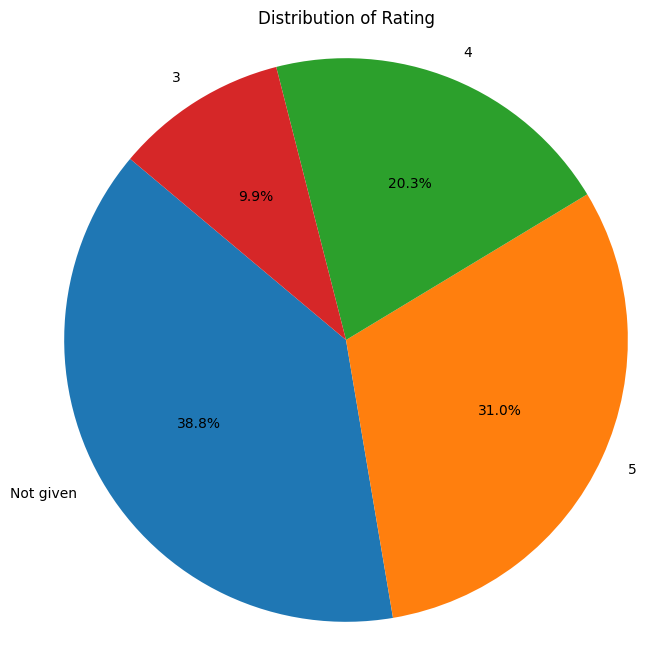

In [10]:
rating_count = df['rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating')
plt.axis('equal')
plt.show()



1. Which cuisines are the most well-liked by consumers?



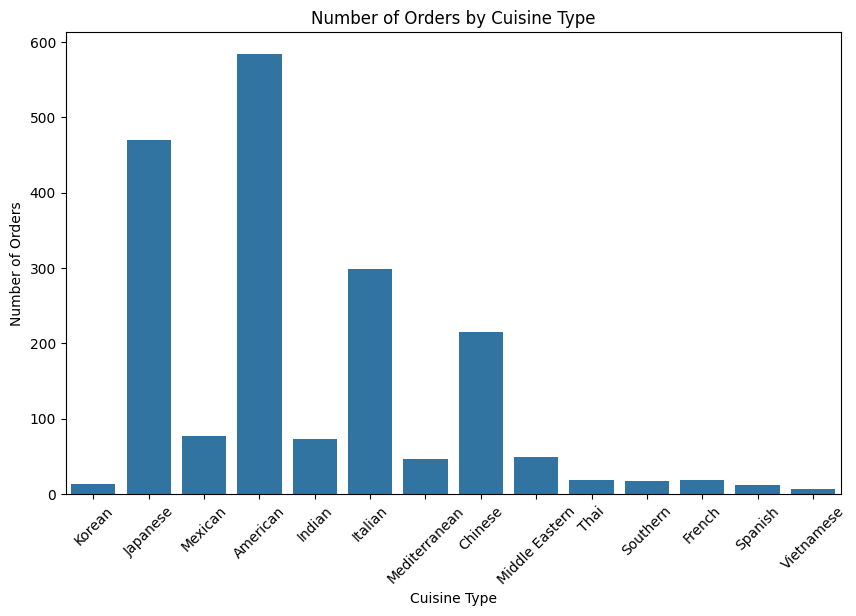

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cuisine_type')
plt.title('Number of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

as per the chart counsumers like the most american , japanese and italian cusines.

2. How do various types of food affect how restaurants are rated?


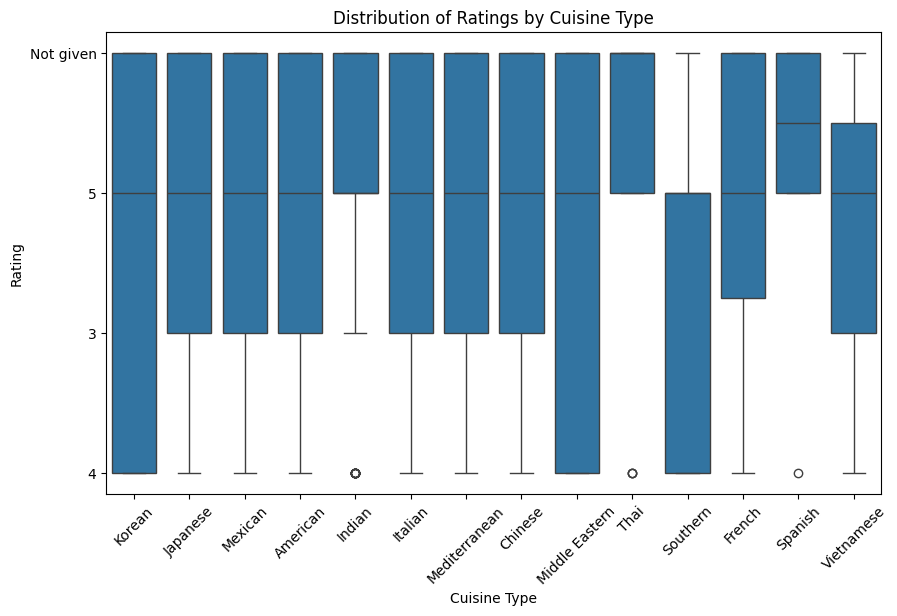

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cuisine_type', y='rating')
plt.title('Distribution of Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

as per the chart korean , middle eastern and southern give their honest rating about resturants.

3. How orders' costs are divided ?

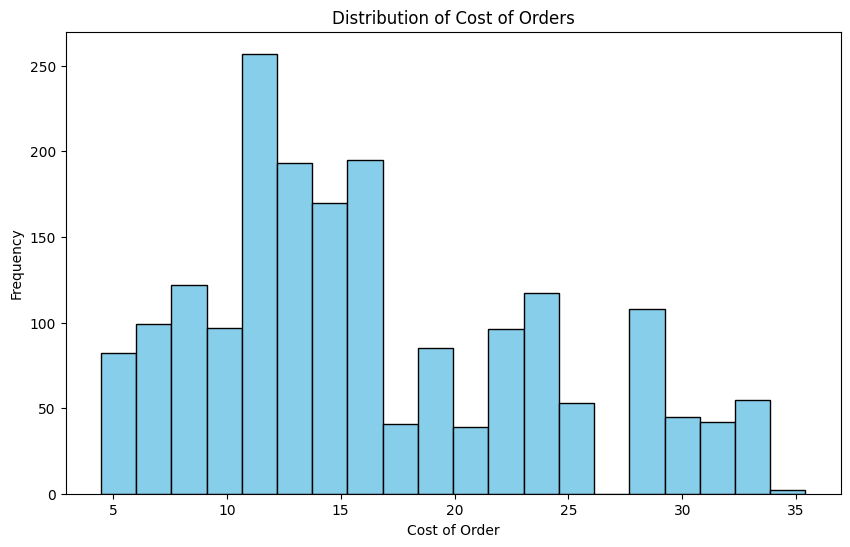

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['cost_of_the_order'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cost of Orders')
plt.xlabel('Cost of Order')
plt.ylabel('Frequency')
plt.show()

 as per bar chart most of the orders are between 10 to 15 dollar.

4.How do various cuisine types differ in terms of how long it takes to prepare food?

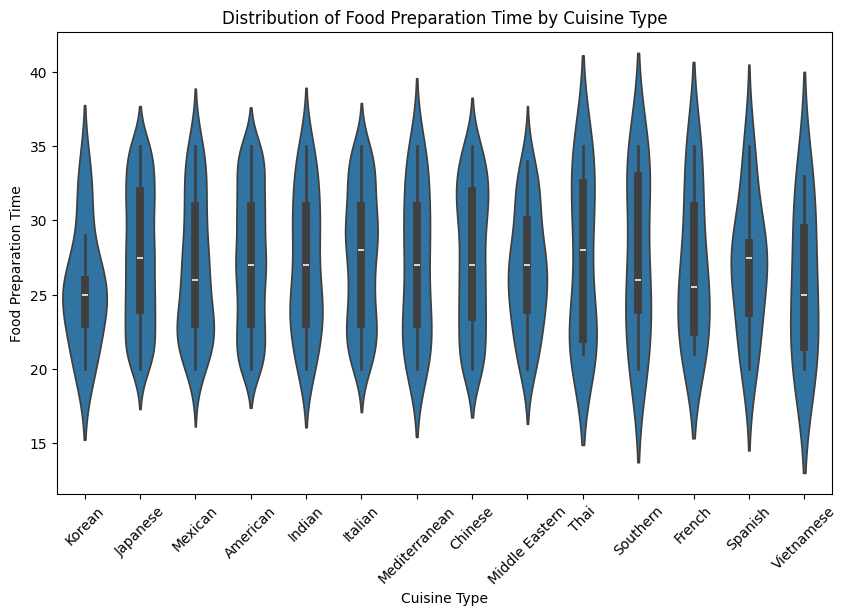

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title('Distribution of Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=45)
plt.show()


as per the chart the cuisine type that takes the most time to perpare is southern , thai and vietnamese.

5. Which days of the week get the most orders?

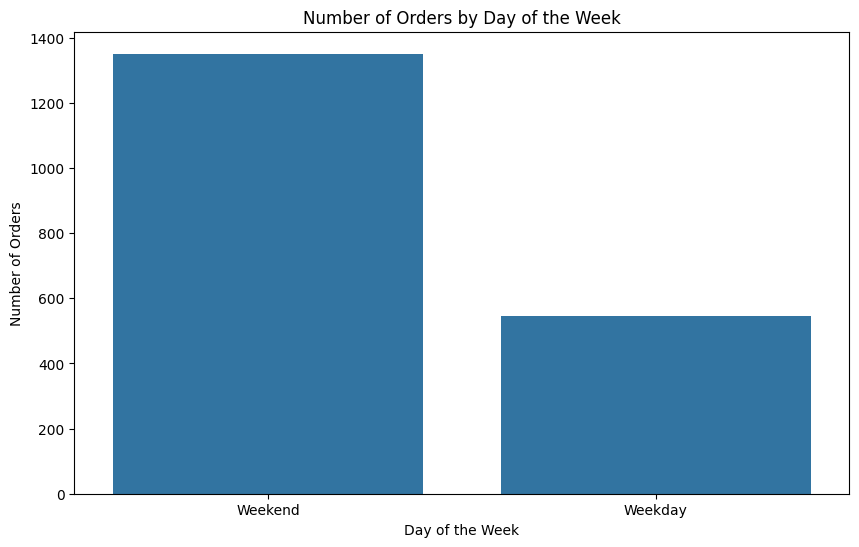

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'].value_counts().index)
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

as per the chart the weekend has the highest number of orders

6. Correlation between the time it takes to prepare food and the time it takes to deliver it


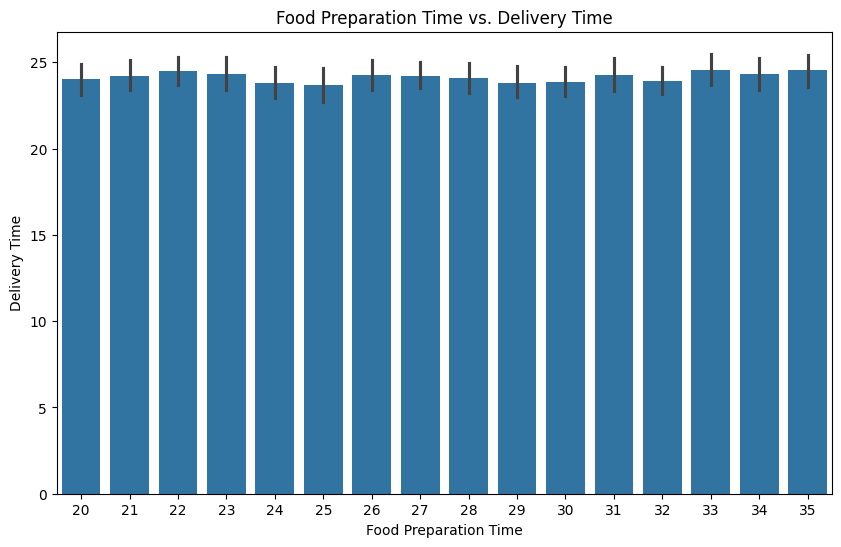

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='food_preparation_time', y='delivery_time')
plt.title('Food Preparation Time vs. Delivery Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Delivery Time')
plt.show()

figure is showing that food prepration and food delivery are highly correlated

7. Correlation between the order price and the restaurant's rating

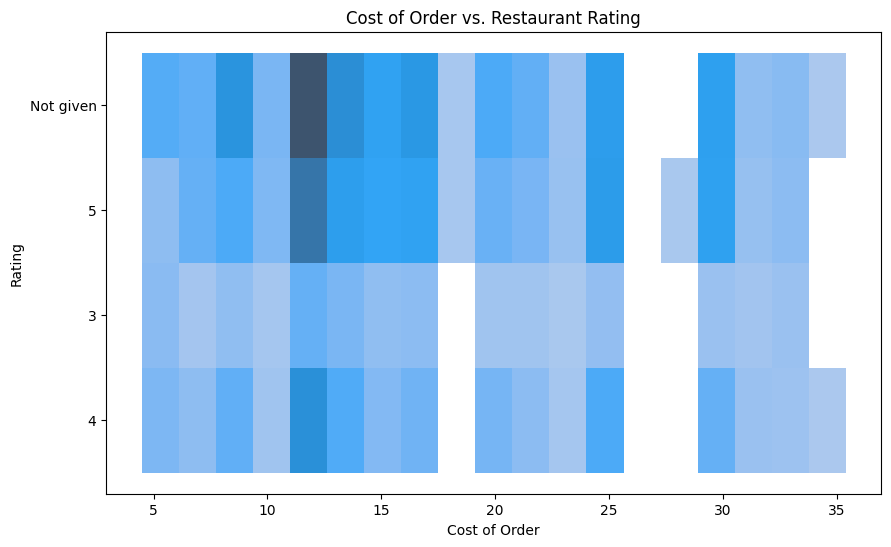

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cost_of_the_order', y='rating')
plt.title('Cost of Order vs. Restaurant Rating')
plt.xlabel('Cost of Order')
plt.ylabel('Rating')
plt.show()

as per the figure when the order cost is high the rating response is also high

8. What kind of food produces the highest mean value of an order?

In [18]:
avg_order_value_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)
avg_order_value_by_cuisine


cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64

french , southern and thai have the highest average cost of orders

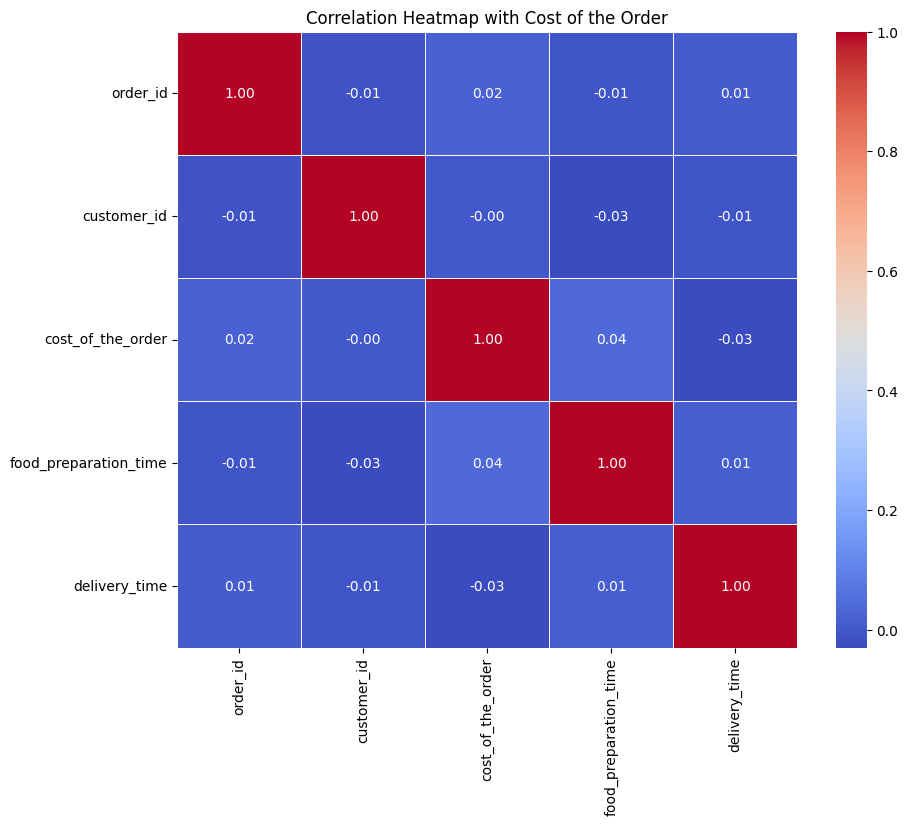

In [19]:
# For the purpose of correlation analysis, only choose numerical columns.
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix.
corr_matrix = numeric_df.corr()

# Compute a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Cost of the Order')
plt.show()

Non of the features are correlated to each other .